# Tensorboard dev / Custom Visualization Template

This is a template to create custom visualization in Tensorboard dev (https://tensorboard.dev/)

## 1. Setup

In [1]:
# Basic imports
from packaging import version
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import numpy as np

In [2]:
# TensorBoard version
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.3


## 2. Training

In [3]:
# Logging into TensorBoard.dev and retrieving data
training_id = "D227T6hYRfypF6qDipspBg"
training = tb.data.experimental.ExperimentFromDev(training_id)
df_train = training.get_scalars()
df_train.shape
df_train

,run,tag,step,value
0,tcn_100_16_0.001_20230606_023539,Learning Rate,0,0.001000
1,tcn_100_16_0.001_20230606_023539,Learning Rate,1,0.001000
2,tcn_100_16_0.001_20230606_023539,Learning Rate,2,0.001000
3,tcn_100_16_0.001_20230606_023539,Learning Rate,3,0.001000
4,tcn_100_16_0.001_20230606_023539,Learning Rate,4,0.001000
...,...,...,...,...
876,tcn_50_16_0.001_20230605_190459,validation/stft,2687,0.999574
877,tcn_50_16_0.001_20230605_190459,validation/stft,2743,0.998289
878,tcn_50_16_0.001_20230605_190459,validation/stft,2799,1.000396
879,tcn_50_16_0.001_20230605_190459/1685987102.942...,training/esr,0,137.629532


In [4]:
# Check the unique values by 'run'
print(df_train["run"].unique())

# Counting and sorting unique values to know how many scalars have been recorded
counts = df_train['run'].value_counts()
runs = counts.index.tolist()

['tcn_100_16_0.001_20230606_023539'
 'tcn_100_16_0.001_20230606_023539/1686016553.5737104'
 'tcn_25_16_0.001_20230605_184451'
 'tcn_25_16_0.001_20230605_184451/1685984697.7333627'
 'tcn_50_16_0.001_20230605_190459'
 'tcn_50_16_0.001_20230605_190459/1685987102.9423397']


In [5]:
train_logs = [run for run in runs if '/' not in run]
print(train_logs)

['tcn_100_16_0.001_20230606_023539', 'tcn_50_16_0.001_20230605_190459', 'tcn_25_16_0.001_20230605_184451']


In [6]:
df_train_filtered = df_train[df_train['run'].isin(train_logs)]

# Listing the tags that represent each scalar type
print(df_train_filtered["tag"].unique())

['Learning Rate' 'training/esr' 'training/stft' 'validation/esr'
 'validation/stft']


In [7]:
# Create a dictionary of dataframes, split by "tag" values
df_dict = {tag: df_train_filtered[df_train_filtered["tag"] == tag] for tag in df_train_filtered["tag"].unique()}

# This creates a dictionary where keys are the unique "tag" values
# And the values are the respective dataframes


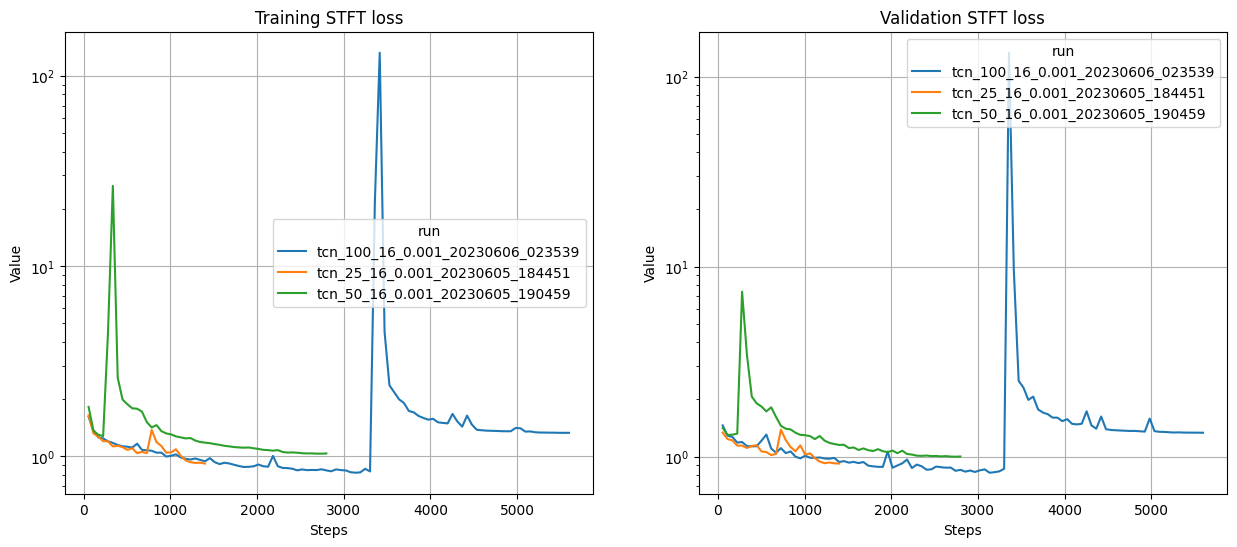

In [8]:
plt.figure(figsize=(15, 6))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['training/stft'].reset_index(), x="step", y="value", hue='run').set_title("Training STFT loss")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Steps")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('log')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['validation/stft'].reset_index(), x='step', y='value', hue='run').set_title("Validation STFT loss")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Steps")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('log')

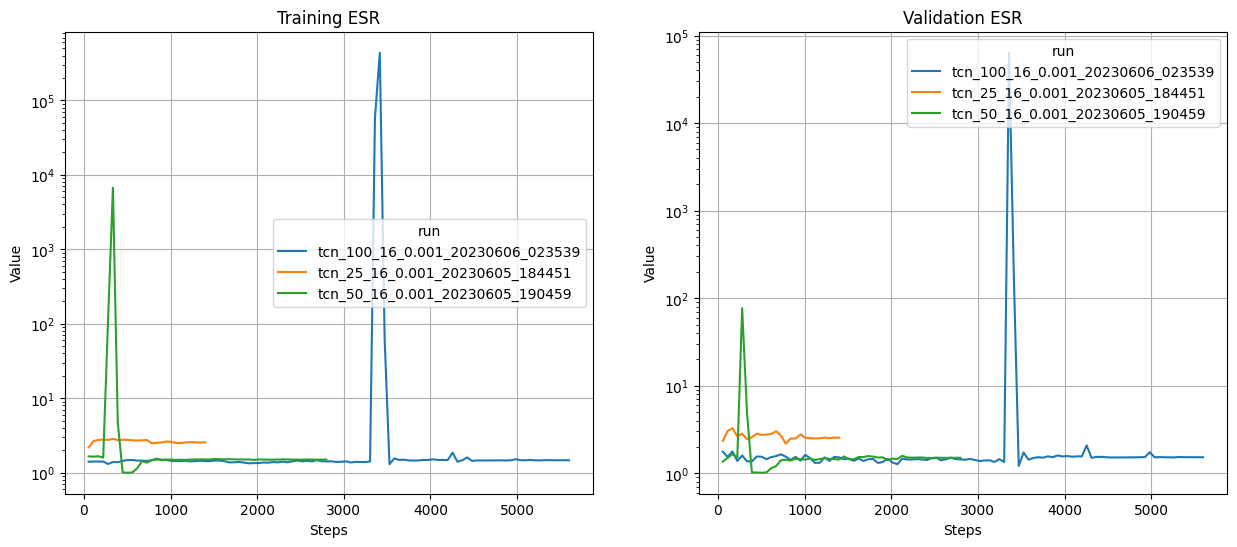

In [9]:
plt.figure(figsize=(15, 6))

# Training plot
plt.subplot(1, 2, 1)
sns.lineplot(data=df_dict['training/esr'].reset_index(), x="step", y="value", hue='run').set_title("Training ESR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Steps")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('log')

# Validation plot
plt.subplot(1, 2, 2)
sns.lineplot(data=df_dict['validation/esr'].reset_index(), x='step', y='value', hue='run').set_title("Validation ESR")
# plt.ylim(0, 100)
# plt.xlim(0, 2000)
plt.grid(True)
plt.xlabel("Steps")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('log')

In [10]:
# Filter logs containing '/'
hparam_logs = [run for run in runs if '/' in run]

# Create dataframe containing only hparam runs
df_hparams = df_train[df_train['run'].isin(hparam_logs)]
df_hparams

,run,tag,step,value
500,tcn_100_16_0.001_20230606_023539/1686016553.57...,training/esr,0,4944.371094
501,tcn_100_16_0.001_20230606_023539/1686016553.57...,validation/esr,0,640.888855
627,tcn_25_16_0.001_20230605_184451/1685984697.733...,training/esr,0,2.622916
628,tcn_25_16_0.001_20230605_184451/1685984697.733...,validation/esr,0,2.643149
879,tcn_50_16_0.001_20230605_190459/1685987102.942...,training/esr,0,137.629532
880,tcn_50_16_0.001_20230605_190459/1685987102.942...,validation/esr,0,3.009155


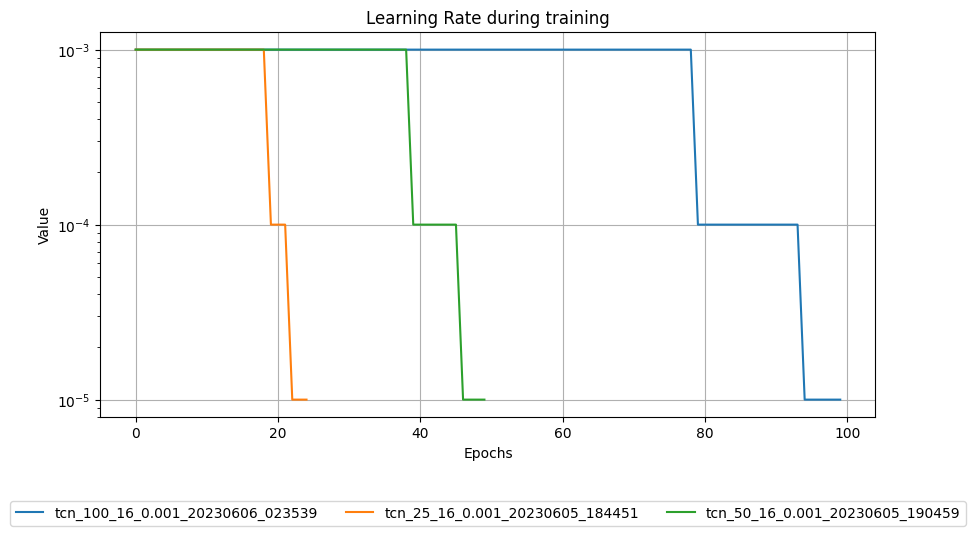

In [25]:
plt.figure(figsize=(10, 5))

# Training plot
plt.subplot(1, 1, 1)
sns.lineplot(data=df_dict['Learning Rate'].reset_index(), x="step", y="value", hue='run').set_title("Learning Rate during training")
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.xscale('linear')
plt.yscale('log')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.savefig('learning_rate.png')

## Save to csv

In [12]:
# Save DataFrame to CSV
df_train_filtered.to_csv('01_train_stft_esr.csv', index=False)
df_hparams.to_csv('01_hparams_stft_esr.csv', index=False)